# APIs e JSON com Python

## 1. APIs e JSON

### O que é uma API?
Uma API(Application Programming Interface) é um conjunto de regras que permite que diferentes sistema ou aplicações se comuniquem entre sí. APIs web são frequentemente usadas para permitir que aplicações acesse funcionalidades ou dados de outros serviços via HTTP/HTTPS.

### O que é JSON?
JSON (JavaScript Object Notation) é um formato leve de troca de dados. Ele é amplamente utilizado em APIs para enviar e receber dados devido à sua simplicidade e fácil leitura por humanos e máquinas. 

## 2. Consumindo APIs com biblioteca `requests`
A biblioteca `requests` em Python é uma ferramenta poderosa para fazer requisições HTTP de maneira simples e intuitiva.

### Exemplo Básico: Fazendo uma Requisição GET com o método `get()`.

In [11]:
import requests

# Fazendo uma requisição GET
response = requests.get('https://pokeapi.co/api/v2/pokemon/mew')

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Convertendo a resposta JSON em um dicionário Python
    data = response.json()
    print(data)
else:
    print(f'Erro: {response.status_code}')


{'abilities': [{'ability': {'name': 'synchronize', 'url': 'https://pokeapi.co/api/v2/ability/28/'}, 'is_hidden': False, 'slot': 1}], 'base_experience': 300, 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/151.ogg', 'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/151.ogg'}, 'forms': [{'name': 'mew', 'url': 'https://pokeapi.co/api/v2/pokemon-form/151/'}], 'game_indices': [{'game_index': 21, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 21, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 21, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 151, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 151, 'version': {'name': 'silver', 'url': 'https://pokeapi.co/api/v2/version/5/'}}, {'game_index': 151, 'version': {'name': 'crystal', 'url': 

### Enviando Dados com uma Requisição POST
Para enviar dados para uma API, usamos o método `post()` e incluímos os dados no corpo da requisição, geralmente no formado JSON.

In [12]:
import requests

# Dados que queremos enviar
payload = {"text": "I am Albino, King of Dragons and supreme ruler of Muspelheim. Kneel before me!"}

# Fazendo uma requisição POST
response = requests.post('https://api.funtranslations.com/translate/valyrian.json', data=payload)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    print('Dados enviados com sucesso!')
    print('Resposta da API:', response.json())
else:
    print(f'Erro: {response.status_code}')


Dados enviados com sucesso!
Resposta da API: {'success': {'total': 1}, 'contents': {'translated': 'Nyke albino,  dārys zaldrīzoti se supreme jentys hen muspelheim. Obūljagon gō issa!', 'text': 'I am Albino, King of Dragons and supreme ruler of Muspelheim. Kneel before me!', 'translation': 'valyrian'}}


## 3. Criando APIs com `Flask`
`Flask` é um micro framework de Python, que permite criar APIs de forma rápida e fácil. 

### Exemplo Básico: Criando uma API RESTful com Flask

In [13]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Rota para obter dados
@app.route('/api/data', methods=['GET'])
def get_data():
    data = {'key1': 'value1', 'key2': 'value2'}
    return jsonify(data)

# Rota para enviar dados
@app.route('/api/data', methods=['POST'])
def post_data():
    data = request.json
    # Aqui, podemos processar os dados recebidos
    return jsonify({'message': 'Dados recebidos com sucesso!', 'data': data}), 201

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

#### Explicação:

* **`@app.route`**: Define uma rota para o endpoint da API.
* **`methods=['GET', 'POST']`**: Especifica quais métodos HTTP são aceitos pela rota.
* **`request.json`**: Extrai dados JSON enviados no corpo da requisição.
* **`jsonify`**: Converte um dicionário Python em JSON e o envia como resposta.

## 4. Integração com Banco de Dados e Outros Serviços
APIs frequentemente interagem com bancos de dados ou outros serviços. Por exemplo, você pode usar a biblioteca `SQLAlchemy` para persistir dados em um banco de dados:

In [ ]:
# from flask import Flask, request, jsonify
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///example.db'
db = SQLAlchemy(app)

class Item(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(80), nullable=False)

@app.route('/api/items', methods=['GET'])
def get_items():
    items = Item.query.all()
    return jsonify([{'id': item.id, 'name': item.name} for item in items])

@app.route('/api/items', methods=['POST'])
def add_item():
    data = request.json
    new_item = Item(name=data['name']) # type: ignore
    db.session.add(new_item)
    db.session.commit()
    return jsonify({'message': 'Item criado!', 'id': new_item.id}), 201

if __name__ == '__main__':
    db.create_all()
    app.run(debug=True)


## 5. Outras Ferramentas e Bibliotecas Relacionadas
* `FastAPI`: Um framework moderno e de alta performance para criar APIs, conhecido por sua velocidade e suporte a validação automática de dados usando pydantic.
* `Swagger/OpenAPI`: Ferramentas que ajudam a documentar e testar APIs automaticamente. Flask-RESTPlus e FastAPI têm integrações para gerar documentações Swagger.

### Exemplo com FastAPI:

In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get('/items/{item_id}')
def read_item(item_id: int, q: str = None): # type: ignore
    return {"item_id": item_id, "q": q}

if __name__ == '__main__':
    import uvicorn
    uvicorn.run(app, host='127.0.0.1', port=8000)


## 6. Testando e Depurando APIs
* `Postman`: Uma ferramenta gráfica para testar APIs, enviar requisições, e visualizar respostas.
* `Insomnia`: Similar ao Postman, mas com uma interface mais minimalista.
* `Pytest`: Para testes automatizados de APIs, você pode usar pytest junto com requests ou httpx para verificar a funcionalidade das suas rotas.

## 7. Autenticação e Segurança
Para proteger suas APIs, você pode usar técnicas como:

* **Token JWT (JSON Web Tokens)**: Para autenticação segura.
* **OAuth2**: Um protocolo para autorizar acessos de forma segura.

### Exemplo com Flask e JWT:

In [ ]:
from flask import Flask, request, jsonify
from flask_jwt_extended import JWTManager, create_access_token, jwt_required

app = Flask(__name__)
app.config['JWT_SECRET_KEY'] = 'super-secret-key'  # Alterar para uma chave segura
jwt = JWTManager(app)

@app.route('/login', methods=['POST'])
def login():
    if request.json.get('username') == 'admin' and request.json.get('password') == 'password': # type: ignore
        access_token = create_access_token(identity={'username': 'admin'})
        return jsonify(access_token=access_token)
    return jsonify({'message': 'Invalid credentials'}), 401

@app.route('/protected', methods=['GET'])
@jwt_required()
def protected():
    return jsonify({'message': 'Access granted!'})

if __name__ == '__main__':
    app.run(debug=True)


## Conclusão
Essas ferramentas e técnicas proporcionam uma base sólida para trabalhar com APIs e JSON em Python. Desde consumir APIs com requests, criar APIs com Flask, até usar bibliotecas mais avançadas como FastAPI, Python oferece um ecossistema robusto para desenvolvimento de aplicações web modernas e seguras.

---

# APIs e JSON com Python

## Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

## Consumindo API de cotações de moedas
Para exemplificar, vamos utilizar uma API de cotações de moedas para podermos melhor compreender o consumo das apis e manipulação das mesmas sem necessidade de registros.

#### Pegar a Cotação Atual de Todas as Moedas 
Normalmente, quando precisamos realizar o consumo de uma api utilizaremos duas bibliotecas, a `requests` e a `json`.


In [3]:
import requests as rq
import json

url = 'https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL'

cotacoes = rq.get(url)
print(cotacoes)

cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

<Response [200]>
{'USDBRL': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.5445', 'low': '5.4756', 'varBid': '0.0241', 'pctChange': '0.44', 'bid': '5.5321', 'ask': '5.5326', 'timestamp': '1724857986', 'create_date': '2024-08-28 12:13:06'}, 'EURBRL': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '6.1613', 'low': '6.1245', 'varBid': '-0.0024', 'pctChange': '-0.04', 'bid': '6.1475', 'ask': '6.1555', 'timestamp': '1724857958', 'create_date': '2024-08-28 12:12:38'}, 'BTCBRL': {'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '343517', 'low': '323000', 'varBid': '-13971', 'pctChange': '-4.1', 'bid': '326616', 'ask': '326634', 'timestamp': '1724857990', 'create_date': '2024-08-28 12:13:10'}}


#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [4]:
for chave, valor in cotacoes_dic.items():
    print(f"{valor['name'].title().replace('/Real Brasileiro', '')} : R${valor['bid']}")

Dólar Americano : R$5.5321
Euro : R$6.1475
Bitcoin : R$326616


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [5]:
import pprint as pp
from datetime import date
def cotacoes_moedas_dias(moeda, dias=30):
    url = f'https://economia.awesomeapi.com.br/json/daily/{moeda}/{dias}'
    return url

cotacao_dolar_30_dias = rq.get(cotacoes_moedas_dias('USD-BRL', 30))
cotacao_dolar_30_dias_dic = cotacao_dolar_30_dias.json()



print("""
          # ---------------------------------------------------------------------------- #
          #                "Cotações do Dolar por dia (30 últimos dias):"             #
          # ---------------------------------------------------------------------------- #
          """)
for dic in cotacao_dolar_30_dias_dic:
    valor_dia = float(dic['bid'])
    dia = date.fromtimestamp(int(dic['timestamp'])).strftime(r'%d/%m/%Y')

    pp.pprint(f"Cotação do dia {dia}: {valor_dia}")



          # ---------------------------------------------------------------------------- #
          #                "Cotações do Dolar por dia (30 últimos dias):"             #
          # ---------------------------------------------------------------------------- #
          
'Cotação do dia 28/08/2024: 5.5246'
'Cotação do dia 27/08/2024: 5.5091'
'Cotação do dia 26/08/2024: 5.4968'
'Cotação do dia 25/08/2024: 5.4857'
'Cotação do dia 23/08/2024: 5.4859'
'Cotação do dia 23/08/2024: 5.4858'
'Cotação do dia 22/08/2024: 5.5911'
'Cotação do dia 21/08/2024: 5.4831'
'Cotação do dia 20/08/2024: 5.4785'
'Cotação do dia 19/08/2024: 5.4068'
'Cotação do dia 18/08/2024: 5.4714'
'Cotação do dia 16/08/2024: 5.4753'
'Cotação do dia 16/08/2024: 5.4728'
'Cotação do dia 15/08/2024: 5.4837'
'Cotação do dia 14/08/2024: 5.4695'
'Cotação do dia 13/08/2024: 5.4558'
'Cotação do dia 12/08/2024: 5.4929'
'Cotação do dia 11/08/2024: 5.5064'
'Cotação do dia 09/08/2024: 5.5054'
'Cotação do dia 09/08/2024: 5.5084

#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [6]:
def cotacoes_moedas_periodo(data_inicial:str, data_final:str, moeda: str = 'USD-BRL', quantidade:str='200'):
    url = f'https://economia.awesomeapi.com.br/json/daily/{moeda}/{quantidade}?start_date={data_inicial}&end_date={data_final}'
    return url

cotacoes_bitcoin_periodo = rq.get(cotacoes_moedas_periodo('20240101','20241031'))
cotacoes_bitcoin_periodo = cotacoes_bitcoin_periodo.json()

for dic in cotacoes_bitcoin_periodo:
    valor_dia = float(dic['bid'])
    dia = date.fromtimestamp(int(dic['timestamp'])).strftime(r'%d/%m/%Y')

    pp.pprint(f"Cotação do dia {dia}: {valor_dia}")

'Cotação do dia 23/08/2024: 5.4859'
'Cotação do dia 23/08/2024: 5.4858'
'Cotação do dia 22/08/2024: 5.5911'
'Cotação do dia 21/08/2024: 5.4831'
'Cotação do dia 20/08/2024: 5.4785'
'Cotação do dia 19/08/2024: 5.4068'
'Cotação do dia 18/08/2024: 5.4714'
'Cotação do dia 16/08/2024: 5.4753'
'Cotação do dia 16/08/2024: 5.4728'
'Cotação do dia 15/08/2024: 5.4837'
'Cotação do dia 14/08/2024: 5.4695'
'Cotação do dia 13/08/2024: 5.4558'
'Cotação do dia 12/08/2024: 5.4929'
'Cotação do dia 11/08/2024: 5.5064'
'Cotação do dia 09/08/2024: 5.5054'
'Cotação do dia 09/08/2024: 5.5084'
'Cotação do dia 08/08/2024: 5.5473'
'Cotação do dia 07/08/2024: 5.6369'
'Cotação do dia 06/08/2024: 5.6567'
'Cotação do dia 05/08/2024: 5.7239'
'Cotação do dia 02/08/2024: 5.7273'
'Cotação do dia 02/08/2024: 5.7278'
'Cotação do dia 01/08/2024: 5.7533'
'Cotação do dia 31/07/2024: 5.658'
'Cotação do dia 30/07/2024: 5.6122'
'Cotação do dia 29/07/2024: 5.6158'
'Cotação do dia 28/07/2024: 5.6658'
'Cotação do dia 26/07/2024: 5

#### Gráfico com as cotações do BitCoin

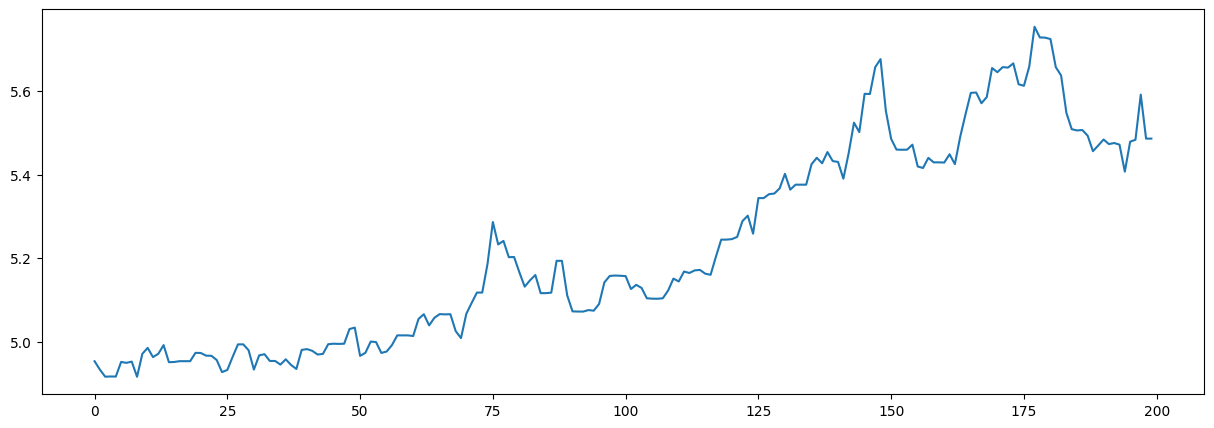

In [7]:
import matplotlib.pyplot as plt

lista_cotacoes_diarias_btc = [float(item['bid']) for item in cotacoes_bitcoin_periodo] # type: ignore
lista_cotacoes_diarias_btc.reverse()

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_diarias_btc)
plt.show()

---

## Consumo de API para validação de CEP

### Consulta de informações de um CEP

In [8]:
import requests as rq

cep = input("Por gentileza digite o CEP")
def obtem_endpoint_cep(cep):
    endpoint = f'https://viacep.com.br/ws/{cep}/json/'
    return endpoint


if len(cep) == 8:
    requisicao = rq.get(obtem_endpoint_cep(cep))
    requisicao_dic = requisicao.json()

    print(requisicao_dic)
    print(f'Cidade de {requisicao_dic['localidade']} - {requisicao_dic['uf']} referente ao CEP {requisicao_dic['cep']} com código do IBGE {requisicao_dic['ibge']} e DDD {requisicao_dic['ddd']}')
else:
    print(f'O CEP {cep} é inválido. Por gentileza digite um CEP válido no formado xxxxxxxx')

{'cep': '99250-000', 'logradouro': '', 'complemento': '', 'unidade': '', 'bairro': '', 'localidade': 'Serafina Corrêa', 'uf': 'RS', 'ibge': '4320404', 'gia': '', 'ddd': '54', 'siafi': '8909'}
Cidade de Serafina Corrêa - RS referente ao CEP 99250-000 com código do IBGE 4320404 e DDD 54


### Busca de CEP a partir de endereço

In [25]:
uf = input("Por gentileza digite a UF do seu estado. Formato: UF - Exemplo: RS")
cidade = input("Por gentileza digite a sua cidade. Formato: Cidade - Exemplo: Serafina Correa")
logradouro = input("Por gentileza digite o seu logradouro. Formado: Logradouro - Exemplo: Afonso de Britto Sheffer")

def obtem_endpoint_endereco(uf, cidade, logradouro):
    endpoint = f'https://viacep.com.br/ws/{uf}/{cidade}/{logradouro}/json/'
    return endpoint

if len(cidade) >= 3 and len(logradouro) >= 3:
    requisicao = rq.get(obtem_endpoint_endereco(uf, cidade, logradouro))
    requisicao_dic = requisicao.json()

    print(requisicao_dic)
else:
    print('Cidade  ou logradouro preenchidos incorretamente. Por favor verifique.')


[{'cep': '99250-000', 'logradouro': '', 'complemento': '', 'unidade': '', 'bairro': '', 'localidade': 'Serafina Corrêa', 'uf': 'RS', 'ibge': '4320404', 'gia': '', 'ddd': '54', 'siafi': '8909'}]


In [27]:
import pandas as pd

tabela = pd.DataFrame(requisicao_dic)
display(tabela)

,cep,logradouro,complemento,unidade,bairro,localidade,uf,ibge,gia,ddd,siafi
0,99250-000,,,,,Serafina Corrêa,RS,4320404,,54,8909


---

## API Ações

Link para documentação da API em questão: https://www.alphavantage.co/documentation/

### Pegando cotações semanais - JSON

In [2]:
import os
import pandas as pd
import requests as rq
import pprint as pp
from dotenv import load_dotenv # type: ignore

load_dotenv()

API_KEY = os.getenv('API_KEY_ALPHA_VANTAGE')

acao_desejada = input('Digite a empresa que deseja verificar as ações.').upper()

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={acao_desejada}&apikey={API_KEY}'

r = rq.get(url)
data = r.json()
tabela = pd.DataFrame(data)
display(tabela)

pp.pprint(data)



,Meta Data,Weekly Adjusted Time Series
1. Information,Weekly Adjusted Prices and Volumes,NaN
2. Symbol,MSFT,NaN
3. Last Refreshed,2024-08-27,NaN
4. Time Zone,US/Eastern,NaN
2024-08-27,NaN,"{'1. open': '416.3650', '2. high': '417.2799',..."
...,...,...
1999-12-10,NaN,"{'1. open': '95.2500', '2. high': '97.1900', '..."
1999-12-03,NaN,"{'1. open': '90.1200', '2. high': '97.1200', '..."
1999-11-26,NaN,"{'1. open': '89.6200', '2. high': '93.3700', '..."
1999-11-19,NaN,"{'1. open': '88.2500', '2. high': '88.5000', '..."


{'Meta Data': {'1. Information': 'Weekly Adjusted Prices and Volumes',
               '2. Symbol': 'MSFT',
               '3. Last Refreshed': '2024-08-27',
               '4. Time Zone': 'US/Eastern'},
 'Weekly Adjusted Time Series': {'1999-11-12': {'1. open': '84.8100',
                                                '2. high': '90.7500',
                                                '3. low': '84.3700',
                                                '4. close': '89.1900',
                                                '5. adjusted close': '27.5555',
                                                '6. volume': '270831600',
                                                '7. dividend amount': '0.0000'},
                                 '1999-11-19': {'1. open': '88.2500',
                                                '2. high': '88.5000',
                                                '3. low': '84.3700',
                                                '4. close': '86.0000',
  

### Pegando cotações semanais - CSV

In [13]:
from io import StringIO

acao_desejada = input('Digite a empresa que deseja verificar as ações.').upper()

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={acao_desejada}&apikey={API_KEY}&datatype=csv'

r = rq.get(url)
data = r.text


tabela = pd.read_csv(StringIO(data))
display(tabela)


,{
0,"""Error Message"": ""Invalid API call. Please..."
1,}


### Cotações

In [12]:
acoes = ['ITUB4', 'ABEV3', 'BBAS3']

compilada = pd.DataFrame()

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key

for contacao in acoes:
    url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={contacao}.SAO&apikey={API_KEY}&datatype=csv'
    r = rq.get(url)
    data = r.text
    tabela = pd.read_csv(StringIO(data))
    compilada = pd.concat([compilada, tabela])

display(tabela)


,symbol,open,high,low,price,volume,latestDay,previousClose,change,changePercent
0,ITUB4.SAO,36.58,36.58,36.58,36.58,14635800,2024-08-27,36.54,0.04,0.1095%


,symbol,open,high,low,price,volume,latestDay,previousClose,change,changePercent
0,ABEV3.SAO,13.03,13.03,13.03,13.03,22235300,2024-08-27,13.08,-0.05,-0.3823%


,symbol,open,high,low,price,volume,latestDay,previousClose,change,changePercent
0,BBAS3.SAO,28.38,28.38,28.01,28.01,8241600,2024-08-27,28.33,-0.32,-1.1295%


### Encontrar ativos

In [14]:
url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=itau&apikey={API_KEY}&datatype=csv'

r = rq.get(url)
data = r.text

tabela = pd.read_csv(StringIO(data))
display(tabela)

,symbol,name,type,region,marketOpen,marketClose,timezone,currency,matchScore
0,ITUB,Itau Unibanco Holding S.A.,Equity,United States,09:30,16:00,UTC-04,USD,0.7500
1,IFRA11.SAO,Itau FIC De Fundos De Investimento Em Direitos...,ETF,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.3077
2,RURA11.SAO,Itau Asset Rural Fiagro - Imobiliario,ETF,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.1951


### Informações de Resultado

In [ ]:
url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=MSFT&apikey={API_KEY}'

r = rq.get(url)
data = r.json()
tabela = pd.DataFrame(data['annualEarnings'])
display(tabela)

pp.pprint(data)

---

## API IBGE Gatruíta

Permite pegar dados públicos do IBGE de forma prática

In [18]:
import requests

link = "https://servicodados.ibge.gov.br/api/v3/agregados/7392/periodos/2014/variaveis/10484?localidades=N1[all]"

requisicao = requests.get(link)
informacoes = requisicao.json()

# import pprint

# pprint.pprint(informacoes[0]['resultados'][0]['series'])

item_busca = informacoes[0]['variavel'] # variavel
resultados = informacoes[0]['resultados'][0]['series'] # series

In [19]:
print(item_busca)
print(resultados)

Número de espécies da fauna e da flora brasileira avaliadas quanto ao risco de extinção
[{'localidade': {'id': '1', 'nivel': {'id': 'N1', 'nome': 'Brasil'}, 'nome': 'Brasil'}, 'serie': {'2014': '16645'}}]


---

### API do Banco Central

https://dadosabertos.bcb.gov.br/dataset?res_format=API

In [22]:
import requests
# import pprint

link = "https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=10000&$orderby=Data%20desc&$format=json"

requisicao = requests.get(link)
informacoes = requisicao.json()


# pprint.pprint(informacoes)

In [21]:
import pandas as pd

tabela = pd.DataFrame(informacoes["value"])

display(tabela)

,Data,Quantidade,Valor,Denominacao,Especie
0,2024-08-27,3191004917,3.191005e+07,0.01,Moedas
1,2024-08-27,8012403018,4.006202e+08,0.05,Moedas
2,2024-08-27,8186775722,8.186776e+08,0.10,Moedas
3,2024-08-27,3689367728,9.223419e+08,0.25,Moedas
4,2024-08-27,3720484049,1.860242e+09,0.50,Moedas
...,...,...,...,...,...
9995,2021-10-25,83299174,1.665983e+10,200.00,Cédulas
9996,2021-10-22,3191178993,3.191179e+07,0.01,Moedas
9997,2021-10-22,7276453159,3.638227e+08,0.05,Moedas
9998,2021-10-22,7502635141,7.502635e+08,0.10,Moedas


In [23]:
# pegar todas as informacoes com varias requisiçoes

tabela_final = pd.DataFrame()
pular_indice = 0

while True:
    link = f'https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=10000&$skip={pular_indice}&$orderby=Data%20desc&$format=json'
    requisicao = requests.get(link)
    informacoes = requisicao.json()
    tabela = pd.DataFrame(informacoes["value"])
    if len(informacoes['value']) < 1:
        break
    tabela_final = pd.concat([tabela_final, tabela])
    pular_indice += 10000

display(tabela_final)

,Data,Quantidade,Valor,Denominacao,Especie
0,2024-08-27,3191004917,3.191005e+07,0.01,Moedas
1,2024-08-27,8012403018,4.006202e+08,0.05,Moedas
2,2024-08-27,8186775722,8.186776e+08,0.10,Moedas
3,2024-08-27,3689367728,9.223419e+08,0.25,Moedas
4,2024-08-27,3720484049,1.860242e+09,0.50,Moedas
...,...,...,...,...,...
4836,1994-10-03,181609358,1.816094e+08,1.00,Moedas
4837,1994-10-03,252922174,1.264611e+09,5.00,Cédulas
4838,1994-10-03,273630983,2.736310e+09,10.00,Cédulas
4839,1994-10-03,28945486,1.447274e+09,50.00,Cédulas
